In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.shape

(891, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df = df.drop(['Name','PassengerId','Cabin','Ticket'], axis=1)
df.shape

(891, 8)

In [9]:
df = df.dropna()
df.shape

(712, 8)

In [10]:
df['Survived'].value_counts()

Survived
0    424
1    288
Name: count, dtype: int64

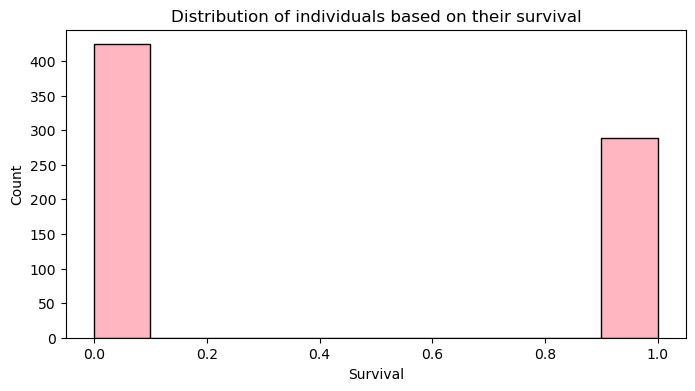

In [11]:
plt.figure(figsize=(8, 4))
plt.hist(df['Survived'], color='lightpink', edgecolor='black')
plt.xlabel('Survival')
plt.ylabel('Count')
plt.title('Distribution of individuals based on their survival')
plt.show()

In [12]:
df = pd.get_dummies(df)

Pearson Correlation Coefficient Matrix:
            Survived    Pclass       Age     SibSp     Parch      Fare  \
Survived    1.000000 -0.356462 -0.082446 -0.015523  0.095265  0.266100   
Pclass     -0.356462  1.000000 -0.365902  0.065187  0.023666 -0.552893   
Age        -0.082446 -0.365902  1.000000 -0.307351 -0.187896  0.093143   
SibSp      -0.015523  0.065187 -0.307351  1.000000  0.383338  0.139860   
Parch       0.095265  0.023666 -0.187896  0.383338  1.000000  0.206624   
Fare        0.266100 -0.552893  0.093143  0.139860  0.206624  1.000000   
Sex_female  0.536762 -0.150826 -0.099037  0.106296  0.249543  0.182457   
Sex_male   -0.536762  0.150826  0.099037 -0.106296 -0.249543 -0.182457   
Embarked_C  0.195673 -0.279194  0.038268 -0.046227 -0.009523  0.301337   
Embarked_Q -0.048966  0.131989 -0.021693  0.051331 -0.009417 -0.062346   
Embarked_S -0.159015  0.197831 -0.025431  0.018968  0.013259 -0.250994   

            Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  


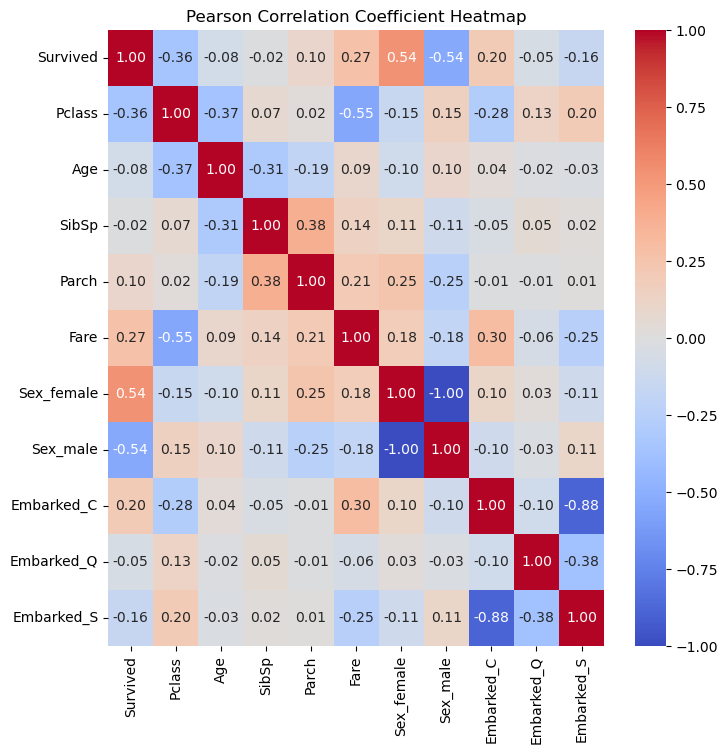

In [15]:
# Calculate the Pearson correlation coefficient matrix
correlation_matrix = df.corr(method='pearson')

# Display the correlation matrix
print("Pearson Correlation Coefficient Matrix:")
print(correlation_matrix)

# Create a heatmap for the correlation matrix
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Coefficient Heatmap')
plt.show()


<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
C:\Users\dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


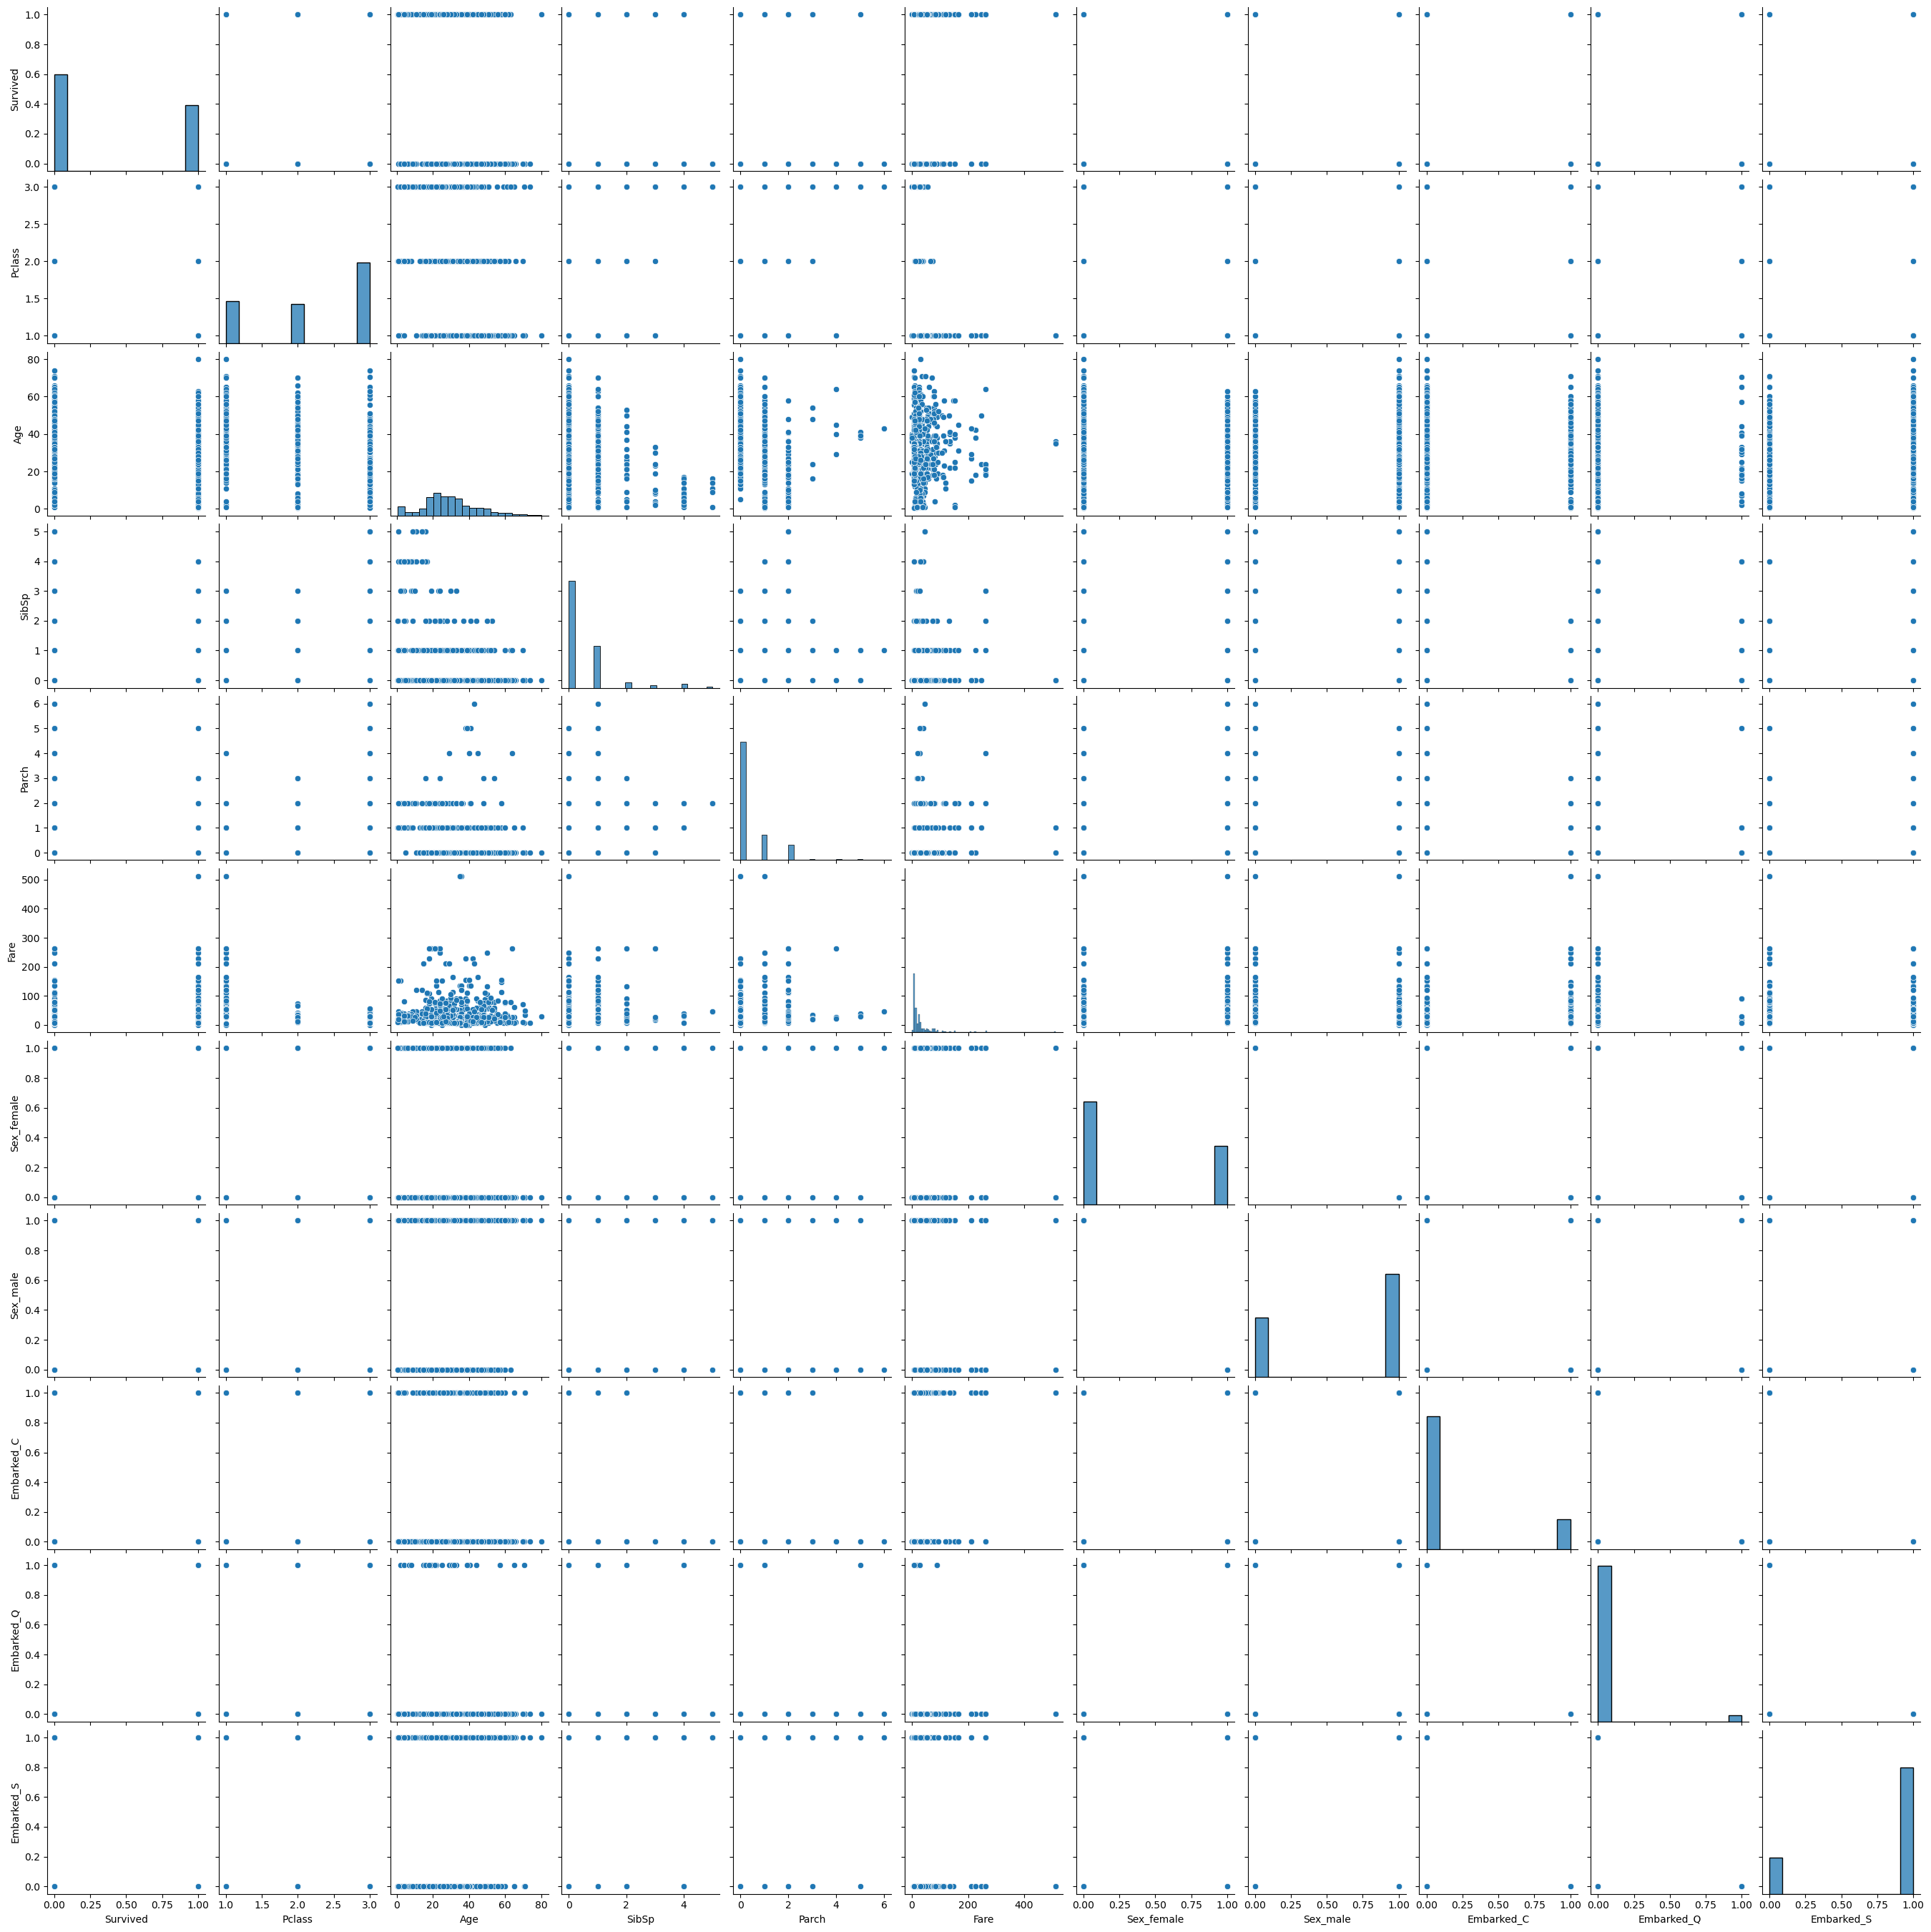

In [14]:
sns.pairplot(df)